In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Normalization

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import pickle
import joblib
from IPython.display import clear_output



dataset = pd.read_csv("../GTZAN/Data/features_30_sec.csv")

df = dataset.copy()

# non_floats = []
# for col in df.iloc[:,:-1]:
#     if df[col].dtypes != "float64":
#         non_floats.append(col)
# df = df.drop(columns=non_floats)

# L = len(df.columns)
# X = df.iloc[:,:L-1].values
# scaler = StandardScaler()
# x_scaled = scaler.fit_transform(X)

X = df.drop(['filename','length','label'],axis=1)
y = df['label']
df.label = pd.Categorical(df.label)
y = np.array(df.label.cat.codes)
loaded_scaler = joblib.load('../scaler.pkl')

X = loaded_scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)
def train(epochs_num):
    model = Sequential([
        Dense(100, activation='relu', input_shape=(X.shape[1],)),
        Dense(100, activation='relu'),
        Dense(10, activation='softmax')
    ])

    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    model.fit(X_train, y_train, epochs=epochs_num, batch_size=32, verbose=1)
    pred = model.predict(X_test)
    y_pred = pred.argmax(axis=-1)
    clear_output()
    return (accuracy_score(y_pred, y_test))
# train(190)

# with open('nn_model.pkl', 'wb') as file:
#     pickle.dump(model, file)

In [61]:
X_train

array([[0.22047453, 0.96081835, 0.30420414, ..., 0.15980892, 0.16724164,
        0.14048117],
       [0.18843323, 0.71477673, 0.21954642, ..., 0.077155  , 0.46533991,
        0.09223823],
       [0.72647852, 0.38264636, 0.45880295, ..., 0.0641128 , 0.66813829,
        0.04771484],
       ...,
       [0.25855325, 0.74165997, 0.05233047, ..., 0.14252449, 0.32653649,
        0.12060269],
       [0.72725693, 0.64043939, 0.47553117, ..., 0.080578  , 0.66811511,
        0.07158391],
       [0.21559708, 0.61683127, 0.0982516 , ..., 0.1201252 , 0.48254386,
        0.09042979]])

In [34]:
import matplotlib.pyplot as plt
res = []
for epoch in range(50,301,5):
    res.append(train(epoch))
plt.figure(figsize = (10,6))

plt.plot(range(50,301,5), res, color = 'blue', linestyle = '--', markersize = '10', markerfacecolor = 'red', marker = 'o')

plt.title('Epoch / Error_Rate')
plt.xlabel('Epoch')
plt.ylabel('Error Rate')

Epoch 1/65


/home/khangpt/anaconda3/lib/python3.11/site-packages/keras/src/layers/preprocessing/normalization.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/home/khangpt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


KeyboardInterrupt: 

In [38]:
X_train.shape[1]

57

In [18]:
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
import seaborn as sns


model = Sequential([
    Dense(300, activation='relu'),                                                                      
    Dense(100, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=245, batch_size=32, verbose=1)
pred = model.predict(X_test)
y_pred = pred.argmax(axis=-1)


Epoch 1/245
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 921us/step - accuracy: 0.2042 - loss: 2.2565 
Epoch 2/245
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3528 - loss: 1.9512 
Epoch 3/245
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4407 - loss: 1.6495 
Epoch 4/245
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step - accuracy: 0.5042 - loss: 1.4562
Epoch 5/245
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 927us/step - accuracy: 0.5353 - loss: 1.3203
Epoch 6/245
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 958us/step - accuracy: 0.5425 - loss: 1.2352
Epoch 7/245
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step - accuracy: 0.5959 - loss: 1.1859
Epoch 8/245
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5782 - loss: 1.1457 
Epoch 9/245
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step - accuracy: 0.6017 - loss: 1.1033
Epoch 10/245
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6193 - loss: 1.0165 
Epoch 11/245
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6432 - loss: 0.9947 
Epoch 12/245
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1m

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


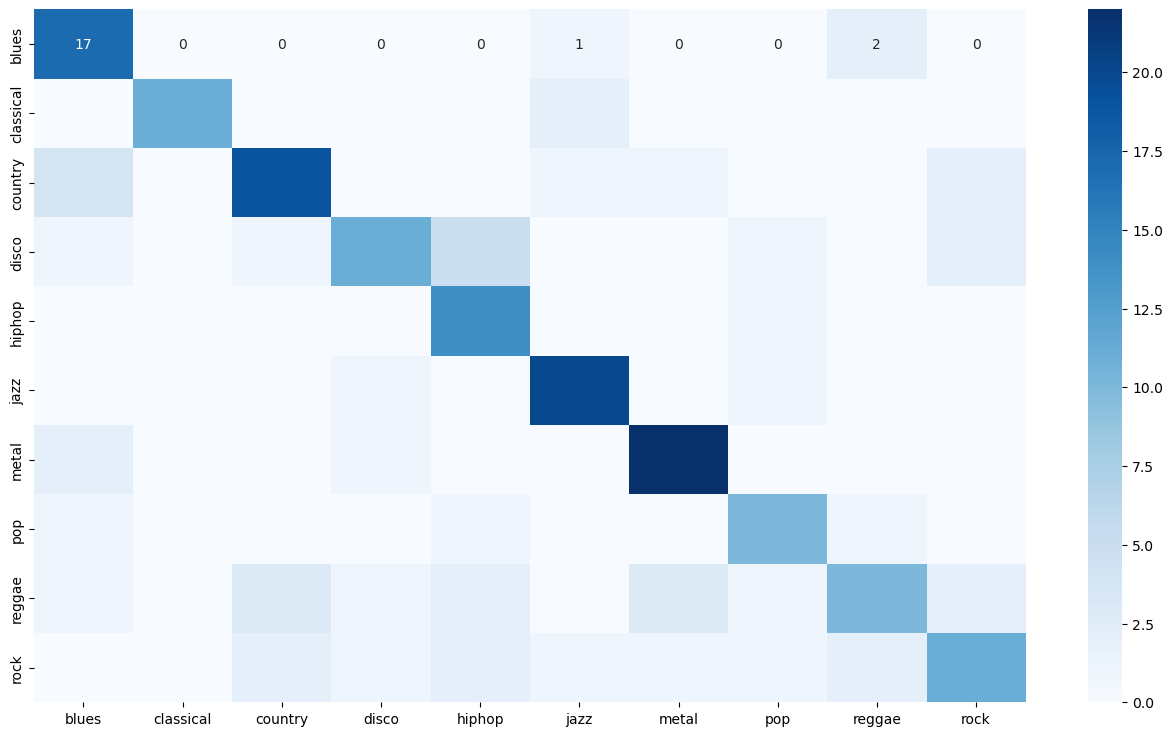

In [19]:
pred = np.argmax(model.predict(X_test),axis=-1)
confusion_matr = confusion_matrix(y_test, pred) #normalize = 'true'
plt.figure(figsize = (16, 9))
sns.heatmap(confusion_matr, cmap="Blues", annot=True, 
            xticklabels = ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"],
           yticklabels=["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"]);

In [4]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.62      0.80      0.70        20
           1       1.00      0.92      0.96        13
           2       0.80      0.59      0.68        27
           3       0.76      0.62      0.68        21
           4       0.68      0.87      0.76        15
           5       0.83      0.91      0.87        22
           6       0.79      0.92      0.85        25
           7       0.65      0.85      0.73        13
           8       0.79      0.48      0.59        23
           9       0.50      0.52      0.51        21

    accuracy                           0.73       200
   macro avg       0.74      0.75      0.73       200
weighted avg       0.74      0.73      0.72       200



In [35]:
import librosa
hop_length = 512

def extract_features(y, sr):
    # Extract features
    chroma_stft_mean = librosa.feature.chroma_stft(y=y, sr=sr, hop_length=hop_length).mean()
    chroma_stft_var = librosa.feature.chroma_stft(y=y, sr=sr, hop_length=hop_length).var()
    rms_mean = librosa.feature.rms(y=y).mean()
    rms_var = librosa.feature.rms(y=y).var()
    spectral_centroid_mean = librosa.feature.spectral_centroid(y=y, sr=sr).mean()
    spectral_centroid_var = librosa.feature.spectral_centroid(y=y, sr=sr).var()
    spectral_bandwidth_mean = librosa.feature.spectral_bandwidth(y=y, sr=sr).mean()
    spectral_bandwidth_var = librosa.feature.spectral_bandwidth(y=y, sr=sr).var()
    rolloff_mean = librosa.feature.spectral_rolloff(y=y, sr=sr).mean()
    rolloff_var = librosa.feature.spectral_rolloff(y=y, sr=sr).var()
    zero_crossing_rate_mean = librosa.feature.zero_crossing_rate(y=y, hop_length=hop_length).mean()
    zero_crossing_rate_var = librosa.feature.zero_crossing_rate(y=y, hop_length=hop_length).var()
    harmony, perceptr = librosa.effects.hpss(y)
    harmony_mean = harmony.mean()
    harmony_var = harmony.var()
    perceptr_mean = perceptr.mean()
    perceptr_var = perceptr.var()

    tempo = librosa.beat.beat_track(y=y, sr=sr, units='time')[0]
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
    mfcc_means = mfccs.mean(axis=1)
    mfcc_vars = mfccs.var(axis=1)
    
    # Create DataFrame
    features = pd.DataFrame({
        'chroma_stft_mean': [chroma_stft_mean],
        'chroma_stft_var': [chroma_stft_var],
        'rms_mean': [rms_mean],
        'rms_var': [rms_var],
        'spectral_centroid_mean': [spectral_centroid_mean],
        'spectral_centroid_var': [spectral_centroid_var],
        'spectral_bandwidth_mean': [spectral_bandwidth_mean],
        'spectral_bandwidth_var': [spectral_bandwidth_var],
        'rolloff_mean': [rolloff_mean],
        'rolloff_var': [rolloff_var],
        'zero_crossing_rate_mean': [zero_crossing_rate_mean],
        'zero_crossing_rate_var': [zero_crossing_rate_var],
        'harmony_mean': [harmony_mean.mean()],
        'harmony_var': [harmony_var.var()],
        'perceptr_mean': [perceptr_mean.mean()],
        'perceptr_var': [perceptr_var.var()],
        'tempo' :[tempo]
    })
    
    # Add MFCC features
    for i in range(1, 21):
        features[f'mfcc{i}_mean'] = [mfcc_means[i-1]]
        features[f'mfcc{i}_var'] = [mfcc_vars[i-1]]
    return features

def analyze_audio(audio_file):
    y, sr = librosa.load(audio_file)
    l = len(y)//2
    features_comb = []
    start = 0
    while start + 30*sr < len(y):
        scaler = joblib.load('../scaler.pkl')
        feature = scaler.transform(np.array(extract_features(y[start:start+30*sr],sr)))
        features_comb.append(feature)
        start = start + 30*sr
    return features_comb

res = analyze_audio('/home/khangpt/MUSIC-GEN-PROJ/GTZAN/Data/genres_original/blues/blues.00003.wav')[0]
pred = model.predict(res)
print(pred.argmax(axis=-1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[0]


/home/khangpt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [11]:
print(X[0,:])

[0.36227871 0.69546819 0.31818806 0.10198314 0.31411683 0.04023293
 0.42287916 0.10978924 0.38553151 0.10256735 0.242545   0.02520928
 0.6327792  0.09488339 0.55327957 0.12008293 0.37830688 0.73810049
 0.08513476 0.63237051 0.05156772 0.48243335 0.06926582 0.61444293
 0.13457432 0.46246626 0.13098415 0.6392172  0.13917619 0.35110159
 0.10313844 0.54457607 0.12807355 0.38142795 0.19271004 0.58648029
 0.13169358 0.43384641 0.0709392  0.63351562 0.11786221 0.58782887
 0.08799329 0.59609659 0.05461938 0.41398867 0.09603205 0.56418604
 0.11270391 0.54128733 0.05761534 0.42244367 0.08244975 0.48795046
 0.10950252 0.59918888 0.07825493]


In [93]:
print(pred.argmax(axis=-1))

[9]


In [72]:
import os
if os.path.exists('../saved_model/nn_model.h5'):
    os.remove('../saved_model/nn_model.h5')

model.save('../saved_model/nn_model.h5')